In [5]:
import pandas as pd
from pathlib import Path

ROOT = Path.cwd().resolve()        
print("ROOT =", ROOT)


DATA = (ROOT / "data").resolve()
print("DATA =", DATA)

print("Parquets encontrados:", list(DATA.glob("*.parquet")))

file = DATA / "application_.parquet"   
print("Leyendo:", file)


df = pd.read_parquet(file)
df.head()

df.shape

df.info()

(df.isna().mean().sort_values(ascending=False).head(20) * 100).round(2)

if "TARGET" in df.columns:
    df["TARGET"].value_counts(normalize=True).mul(100).round(2)
else:
    print("Este parquet no tiene la columna TARGET.")

print(df.shape)
df.head(3)
df.tail(3)
df.describe(include='all').T.head(15)   # primeras 15 filas de resumen
df.isna().mean().sort_values(ascending=False).head(25).mul(100).round(2)


ROOT = F:\pipe5\Documents\Machine Learning\Proyecto ML
DATA = F:\pipe5\Documents\Machine Learning\Proyecto ML\data
Parquets encontrados: [WindowsPath('F:/pipe5/Documents/Machine Learning/Proyecto ML/data/application_.parquet'), WindowsPath('F:/pipe5/Documents/Machine Learning/Proyecto ML/data/bureau.parquet'), WindowsPath('F:/pipe5/Documents/Machine Learning/Proyecto ML/data/bureau_balance.parquet'), WindowsPath('F:/pipe5/Documents/Machine Learning/Proyecto ML/data/credit_card_balance.parquet'), WindowsPath('F:/pipe5/Documents/Machine Learning/Proyecto ML/data/HomeCredit_columns_description.parquet'), WindowsPath('F:/pipe5/Documents/Machine Learning/Proyecto ML/data/installments_payments.parquet'), WindowsPath('F:/pipe5/Documents/Machine Learning/Proyecto ML/data/POS_CASH_balance.parquet'), WindowsPath('F:/pipe5/Documents/Machine Learning/Proyecto ML/data/previous_application.parquet')]
Leyendo: F:\pipe5\Documents\Machine Learning\Proyecto ML\data\application_.parquet
<class 'pandas.co

COMMONAREA_AVG              69.87
COMMONAREA_MODE             69.87
COMMONAREA_MEDI             69.87
NONLIVINGAPARTMENTS_MEDI    69.43
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAPARTMENTS_AVG     69.43
FONDKAPREMONT_MODE          68.39
LIVINGAPARTMENTS_AVG        68.35
LIVINGAPARTMENTS_MEDI       68.35
LIVINGAPARTMENTS_MODE       68.35
FLOORSMIN_MODE              67.85
FLOORSMIN_AVG               67.85
FLOORSMIN_MEDI              67.85
YEARS_BUILD_AVG             66.50
YEARS_BUILD_MODE            66.50
YEARS_BUILD_MEDI            66.50
OWN_CAR_AGE                 65.99
LANDAREA_MEDI               59.38
LANDAREA_AVG                59.38
LANDAREA_MODE               59.38
BASEMENTAREA_MODE           58.52
BASEMENTAREA_MEDI           58.52
BASEMENTAREA_AVG            58.52
EXT_SOURCE_1                56.38
NONLIVINGAREA_MODE          55.18
dtype: float64

TARGET
0    282686
1     24825
Name: count, dtype: int64
TARGET
0    91.93
1     8.07
Name: proportion, dtype: float64


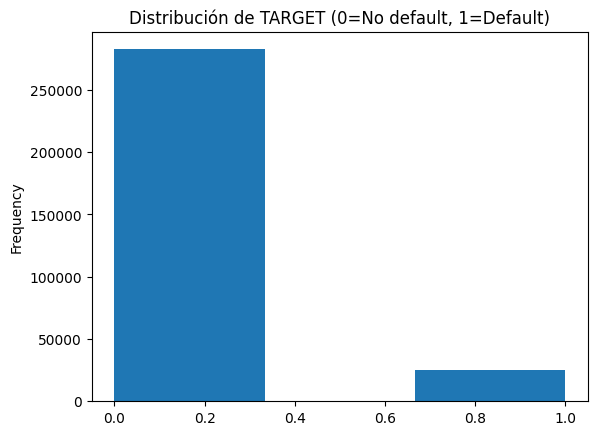

Numéricas: 106
Categóricas: 16


COMMONAREA_AVG              69.87
COMMONAREA_MODE             69.87
COMMONAREA_MEDI             69.87
NONLIVINGAPARTMENTS_MEDI    69.43
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAPARTMENTS_AVG     69.43
FONDKAPREMONT_MODE          68.39
LIVINGAPARTMENTS_AVG        68.35
LIVINGAPARTMENTS_MEDI       68.35
LIVINGAPARTMENTS_MODE       68.35
FLOORSMIN_MODE              67.85
FLOORSMIN_AVG               67.85
FLOORSMIN_MEDI              67.85
YEARS_BUILD_AVG             66.50
YEARS_BUILD_MODE            66.50
YEARS_BUILD_MEDI            66.50
OWN_CAR_AGE                 65.99
LANDAREA_MEDI               59.38
LANDAREA_AVG                59.38
LANDAREA_MODE               59.38
Name: pct_na, dtype: float64

In [8]:
import matplotlib.pyplot as plt

assert "TARGET" in df.columns, "Este parquet debería ser el de train (con TARGET)."
print(df["TARGET"].value_counts(dropna=False))
print(df["TARGET"].value_counts(normalize=True).mul(100).round(2))

df["TARGET"].plot(kind="hist", bins=3)
plt.title("Distribución de TARGET (0=No default, 1=Default)")
plt.show()
num_cols = df.select_dtypes(include=["number"]).columns.tolist()
cat_cols = df.select_dtypes(include=["object","category","bool"]).columns.tolist()
print("Numéricas:", len(num_cols))
print("Categóricas:", len(cat_cols))
na_table = (df.isna().mean().sort_values(ascending=False)
            .rename("pct_na").mul(100).round(2))
na_table.head(20)





In [9]:
from sklearn.feature_selection import mutual_info_classif

# X = solo features numéricas
X_num = df[num_cols].copy()

# y = variable objetivo
y = df["TARGET"]

# Rellenamos nulos con 0 para no romper MI (después harás un relleno mejor)
X_num_filled = X_num.fillna(0)

mi = mutual_info_classif(X_num_filled, y, random_state=0)
mi_series = pd.Series(mi, index=num_cols).sort_values(ascending=False)

mi_series.head(20)




TARGET                         0.281816
FLAG_MOBIL                     0.081529
FLAG_CONT_MOBILE               0.061008
FLAG_DOCUMENT_3                0.057206
FLAG_EMP_PHONE                 0.054618
REGION_RATING_CLIENT_W_CITY    0.027913
REGION_RATING_CLIENT           0.027254
CNT_FAM_MEMBERS                0.024512
FLAG_PHONE                     0.014395
EXT_SOURCE_3                   0.012814
EXT_SOURCE_2                   0.012557
AMT_ANNUITY                    0.011494
DAYS_EMPLOYED                  0.010544
REG_CITY_NOT_WORK_CITY         0.009631
FLOORSMAX_AVG                  0.007419
FLOORSMAX_MEDI                 0.007389
AMT_CREDIT                     0.007297
FLOORSMAX_MODE                 0.007062
AMT_REQ_CREDIT_BUREAU_YEAR     0.006838
FLAG_WORK_PHONE                0.006760
dtype: float64